# Convolutional Neural Networks

In [1]:
from IPython.display import Image

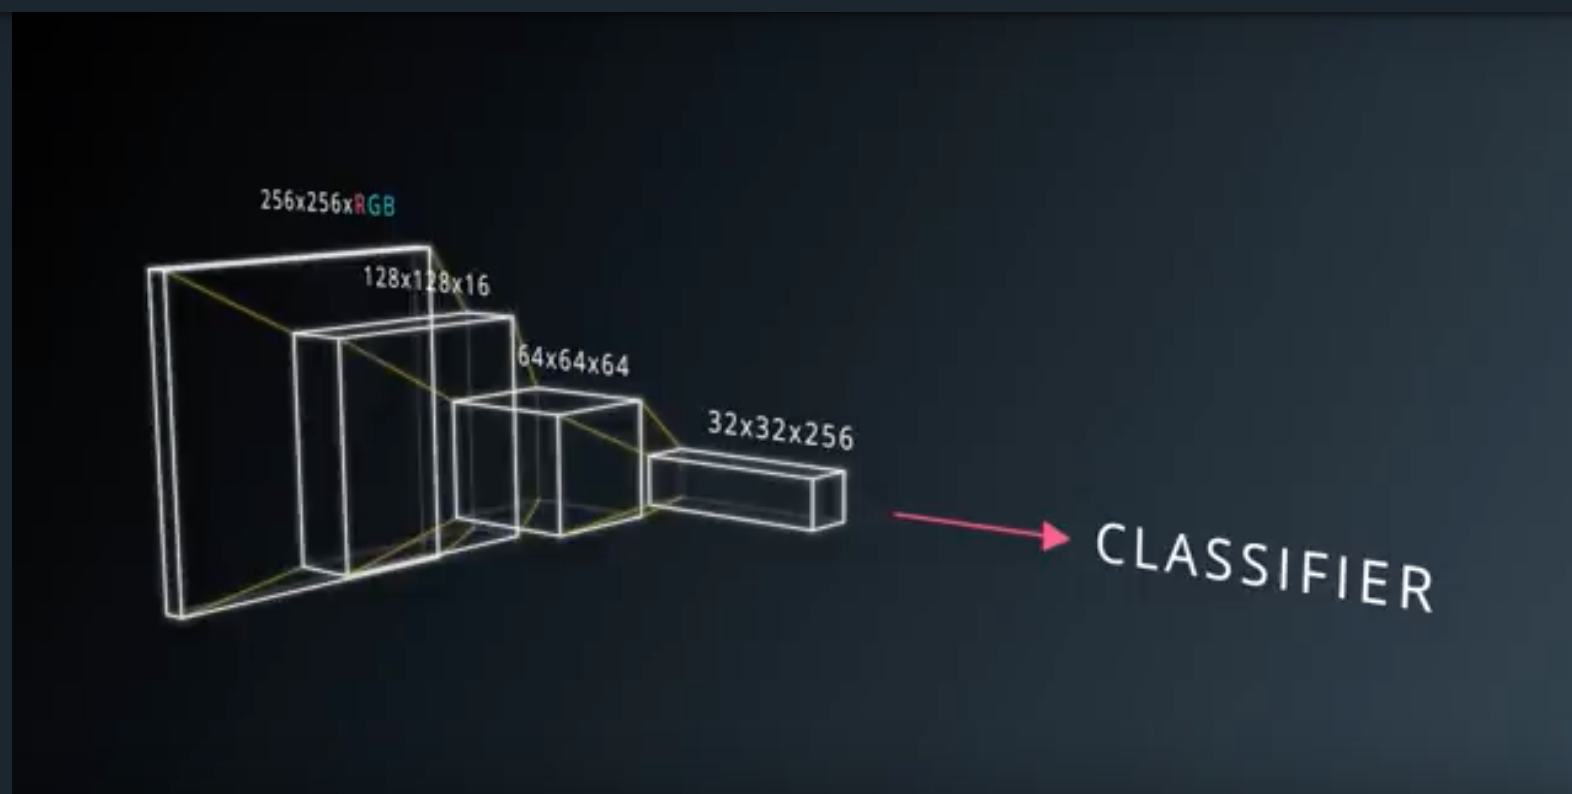

In [2]:
Image(filename='cnn.png')

In [3]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cb19d_heirarchy-diagram/heirarchy-diagram.jpg')

## Filters

In [4]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377d67_vlcsnap-2016-11-24-15h52m47s438/vlcsnap-2016-11-24-15h52m47s438.png')

In [5]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377e4f_neilsen-pic/neilsen-pic.png')

In [6]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840ffda_filter-depth/filter-depth.png')

### Choosing a filter depth of k connects each patch to k neurons in the next layer.

## Parameters

The following formula gives us the width of the next layer:  
W_out = (W−F+2P)/S+1.

The output height would be:  
H_out = (H-F+2P)/S + 1.

And the output depth would be equal to the number of filters:  
D_out = K.

The output volume would be:  
W_out \* H_out \* D_out.

## Convolution Output Shape

Setup
H = height, W = width, D = depth

We have an input of shape 32x32x3 (HxWxD)
20 filters of shape 8x8x3 (HxWxD)
A stride of 2 for both the height and width (S)
With padding of size 1 (P)
Recall the formula for calculating the new height or width:

new_height = (input_height - filter_height + 2 * P)/S + 1
new_width = (input_width - filter_width + 2 * P)/S + 1

In [7]:
import tensorflow as tf

(32 - 8 + 2 * 1)/2 + 1 = 14
(32 - 8 + 2 * 1)/2 + 1 = 14

In [8]:
input = tf.placeholder(tf.float32, (None, 32, 32, 3))
filter_weights = tf.Variable(tf.truncated_normal((8, 8, 3, 20))) # (height, width, input_depth, output_depth)
filter_bias = tf.Variable(tf.zeros(20))
strides = [1, 2, 2, 1] # (batch, height, width, depth)
padding = 'SAME'
conv = tf.nn.conv2d(input, filter_weights, strides, padding) + filter_bias

# Tensorflow Max Pooling

In [9]:
Image(url='https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582aac09_max-pooling/max-pooling.png')

In [ ]:
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
conv_layer = tf.nn.bias_add(conv_layer, bias)
conv_layer = tf.nn.relu(conv_layer)
# Apply Max Pooling
conv_layer = tf.nn.max_pool(
    conv_layer,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='SAME')

## Inception Module

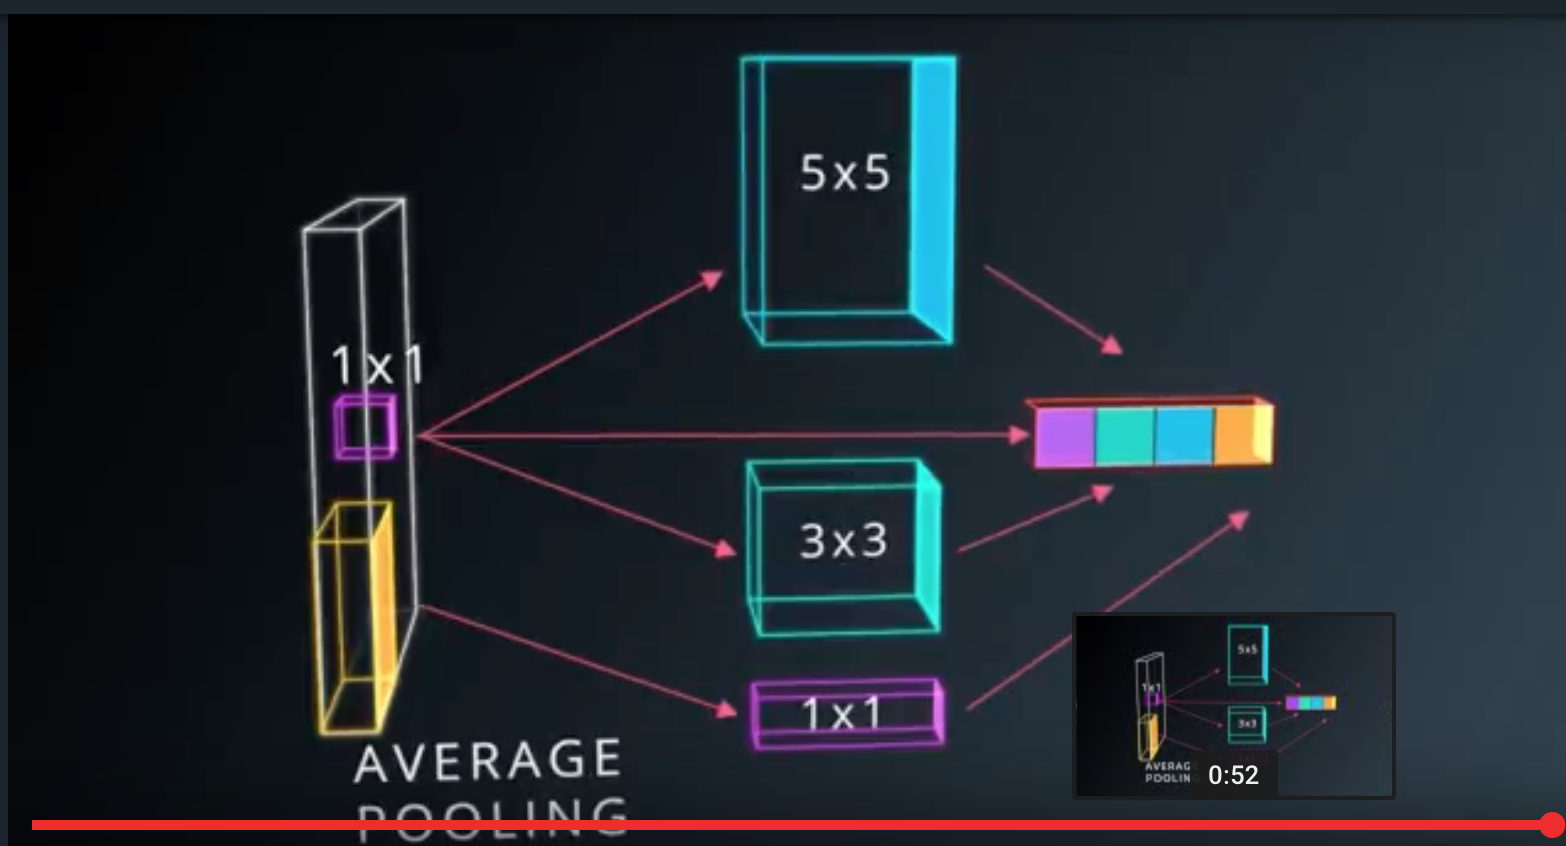

In [11]:
Image(filename='inception.png')

## Convolutional Network in Tensorflow

In [20]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.00001
epochs = 10
batch_size = 128

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
n_classes = 10  # MNIST total classes (0-9 digits)
dropout = 0.75  # Dropout, probability to keep units

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


### Weights and Biases

In [21]:
# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))}

### Convolutions

In [22]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

### Max Pooling

In [23]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
    ksize=[1, k, k, 1],
    strides=[1, k, k, 1],
    padding='SAME')

### Model

In [24]:
def conv_net(x, weights, biases, dropout):
    # Layer 1 - 28*28*1 to 14*14*32
    # For example, the first layer shapes the images from 28x28x1 to 28x28x32 in the convolution step. 
    # Then next step applies max pooling, turning each sample into 14x14x32
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2 - 14*14*32 to 7*7*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer - 7*7*64 to 1024
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

### Session

In [25]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            valid_acc = sess.run(accuracy, feed_dict={
                x: mnist.validation.images[:test_valid_size],
                y: mnist.validation.labels[:test_valid_size],
                keep_prob: 1.})

            print('Epoch {:>2}, Batch {:>3} - Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch + 1,
                loss,
                valid_acc))

    # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
        x: mnist.test.images[:test_valid_size],
        y: mnist.test.labels[:test_valid_size],
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))

Epoch  1, Batch   1 - Loss: 40389.6484 Validation Accuracy: 0.093750
Epoch  1, Batch   2 - Loss: 31103.5664 Validation Accuracy: 0.117188
Epoch  1, Batch   3 - Loss: 29672.4355 Validation Accuracy: 0.140625
Epoch  1, Batch   4 - Loss: 20765.4961 Validation Accuracy: 0.167969
Epoch  1, Batch   5 - Loss: 23473.4023 Validation Accuracy: 0.183594
Epoch  1, Batch   6 - Loss: 24028.9609 Validation Accuracy: 0.183594
Epoch  1, Batch   7 - Loss: 19585.4590 Validation Accuracy: 0.218750
Epoch  1, Batch   8 - Loss: 20033.4570 Validation Accuracy: 0.234375
Epoch  1, Batch   9 - Loss: 20348.2656 Validation Accuracy: 0.226562
Epoch  1, Batch  10 - Loss: 17946.7559 Validation Accuracy: 0.226562
Epoch  1, Batch  11 - Loss: 16154.2803 Validation Accuracy: 0.250000
Epoch  1, Batch  12 - Loss: 17279.1445 Validation Accuracy: 0.269531
Epoch  1, Batch  13 - Loss: 15597.5508 Validation Accuracy: 0.289062
Epoch  1, Batch  14 - Loss: 14493.9980 Validation Accuracy: 0.300781
Epoch  1, Batch  15 - Loss: 16914.

Epoch  1, Batch 121 - Loss:  4529.8652 Validation Accuracy: 0.601562
Epoch  1, Batch 122 - Loss:  3709.7571 Validation Accuracy: 0.609375
Epoch  1, Batch 123 - Loss:  4335.3711 Validation Accuracy: 0.601562
Epoch  1, Batch 124 - Loss:  5145.9014 Validation Accuracy: 0.609375
Epoch  1, Batch 125 - Loss:  5306.8457 Validation Accuracy: 0.613281
Epoch  1, Batch 126 - Loss:  2802.1252 Validation Accuracy: 0.609375
Epoch  1, Batch 127 - Loss:  3200.9131 Validation Accuracy: 0.617188
Epoch  1, Batch 128 - Loss:  4440.8574 Validation Accuracy: 0.613281
Epoch  1, Batch 129 - Loss:  4808.3604 Validation Accuracy: 0.613281
Epoch  1, Batch 130 - Loss:  4085.0542 Validation Accuracy: 0.625000
Epoch  1, Batch 131 - Loss:  3548.4409 Validation Accuracy: 0.628906
Epoch  1, Batch 132 - Loss:  2707.3691 Validation Accuracy: 0.609375
Epoch  1, Batch 133 - Loss:  2649.2893 Validation Accuracy: 0.613281
Epoch  1, Batch 134 - Loss:  6246.1641 Validation Accuracy: 0.605469
Epoch  1, Batch 135 - Loss:  5240.

Epoch  1, Batch 241 - Loss:  1912.9092 Validation Accuracy: 0.710938
Epoch  1, Batch 242 - Loss:  2799.1021 Validation Accuracy: 0.714844
Epoch  1, Batch 243 - Loss:  3397.6201 Validation Accuracy: 0.718750
Epoch  1, Batch 244 - Loss:  3024.8721 Validation Accuracy: 0.722656
Epoch  1, Batch 245 - Loss:  2790.3140 Validation Accuracy: 0.710938
Epoch  1, Batch 246 - Loss:  2311.7935 Validation Accuracy: 0.710938
Epoch  1, Batch 247 - Loss:  2268.4155 Validation Accuracy: 0.703125
Epoch  1, Batch 248 - Loss:  1737.7769 Validation Accuracy: 0.710938
Epoch  1, Batch 249 - Loss:  2142.9182 Validation Accuracy: 0.710938
Epoch  1, Batch 250 - Loss:  1897.1204 Validation Accuracy: 0.718750
Epoch  1, Batch 251 - Loss:  3170.6890 Validation Accuracy: 0.718750
Epoch  1, Batch 252 - Loss:  2443.7002 Validation Accuracy: 0.718750
Epoch  1, Batch 253 - Loss:  3284.3706 Validation Accuracy: 0.722656
Epoch  1, Batch 254 - Loss:  3181.5811 Validation Accuracy: 0.722656
Epoch  1, Batch 255 - Loss:  2636.

Epoch  1, Batch 361 - Loss:  1770.7910 Validation Accuracy: 0.753906
Epoch  1, Batch 362 - Loss:  1716.4307 Validation Accuracy: 0.750000
Epoch  1, Batch 363 - Loss:  1611.5585 Validation Accuracy: 0.746094
Epoch  1, Batch 364 - Loss:  1304.4976 Validation Accuracy: 0.746094
Epoch  1, Batch 365 - Loss:  1449.4264 Validation Accuracy: 0.757812
Epoch  1, Batch 366 - Loss:  1974.4167 Validation Accuracy: 0.757812
Epoch  1, Batch 367 - Loss:  1639.4727 Validation Accuracy: 0.746094
Epoch  1, Batch 368 - Loss:  2466.9421 Validation Accuracy: 0.746094
Epoch  1, Batch 369 - Loss:  3018.2397 Validation Accuracy: 0.746094
Epoch  1, Batch 370 - Loss:  1332.3955 Validation Accuracy: 0.746094
Epoch  1, Batch 371 - Loss:  1370.8383 Validation Accuracy: 0.753906
Epoch  1, Batch 372 - Loss:   888.0260 Validation Accuracy: 0.750000
Epoch  1, Batch 373 - Loss:  1760.5759 Validation Accuracy: 0.750000
Epoch  1, Batch 374 - Loss:  1362.2371 Validation Accuracy: 0.750000
Epoch  1, Batch 375 - Loss:  2460.

Epoch  2, Batch  51 - Loss:  1266.0443 Validation Accuracy: 0.773438
Epoch  2, Batch  52 - Loss:  1903.9563 Validation Accuracy: 0.769531
Epoch  2, Batch  53 - Loss:  1227.5858 Validation Accuracy: 0.765625
Epoch  2, Batch  54 - Loss:  1894.5557 Validation Accuracy: 0.761719
Epoch  2, Batch  55 - Loss:  1850.4077 Validation Accuracy: 0.765625
Epoch  2, Batch  56 - Loss:   771.9987 Validation Accuracy: 0.769531
Epoch  2, Batch  57 - Loss:  1337.7090 Validation Accuracy: 0.769531
Epoch  2, Batch  58 - Loss:  1848.0247 Validation Accuracy: 0.769531
Epoch  2, Batch  59 - Loss:  1394.7163 Validation Accuracy: 0.765625
Epoch  2, Batch  60 - Loss:   970.7274 Validation Accuracy: 0.769531
Epoch  2, Batch  61 - Loss:  1155.1233 Validation Accuracy: 0.773438
Epoch  2, Batch  62 - Loss:  1401.5867 Validation Accuracy: 0.765625
Epoch  2, Batch  63 - Loss:  1449.4606 Validation Accuracy: 0.765625
Epoch  2, Batch  64 - Loss:   928.7906 Validation Accuracy: 0.769531
Epoch  2, Batch  65 - Loss:  2057.

Epoch  2, Batch 171 - Loss:  1634.8320 Validation Accuracy: 0.773438
Epoch  2, Batch 172 - Loss:  1329.7024 Validation Accuracy: 0.773438
Epoch  2, Batch 173 - Loss:  1304.0229 Validation Accuracy: 0.781250
Epoch  2, Batch 174 - Loss:   883.1129 Validation Accuracy: 0.781250
Epoch  2, Batch 175 - Loss:  1439.0977 Validation Accuracy: 0.785156
Epoch  2, Batch 176 - Loss:  1309.5425 Validation Accuracy: 0.777344
Epoch  2, Batch 177 - Loss:  1606.4904 Validation Accuracy: 0.781250
Epoch  2, Batch 178 - Loss:  1689.1045 Validation Accuracy: 0.781250
Epoch  2, Batch 179 - Loss:  1192.4188 Validation Accuracy: 0.781250
Epoch  2, Batch 180 - Loss:  1053.0978 Validation Accuracy: 0.773438
Epoch  2, Batch 181 - Loss:  1092.3683 Validation Accuracy: 0.769531
Epoch  2, Batch 182 - Loss:  1426.9004 Validation Accuracy: 0.773438
Epoch  2, Batch 183 - Loss:  1343.8539 Validation Accuracy: 0.777344
Epoch  2, Batch 184 - Loss:   758.1461 Validation Accuracy: 0.777344
Epoch  2, Batch 185 - Loss:  1619.

Epoch  2, Batch 291 - Loss:   876.6555 Validation Accuracy: 0.800781
Epoch  2, Batch 292 - Loss:  1152.8650 Validation Accuracy: 0.808594
Epoch  2, Batch 293 - Loss:  1097.3396 Validation Accuracy: 0.804688
Epoch  2, Batch 294 - Loss:  1045.4594 Validation Accuracy: 0.804688
Epoch  2, Batch 295 - Loss:  1348.5565 Validation Accuracy: 0.808594
Epoch  2, Batch 296 - Loss:   907.2003 Validation Accuracy: 0.808594
Epoch  2, Batch 297 - Loss:  1075.6880 Validation Accuracy: 0.808594
Epoch  2, Batch 298 - Loss:  1232.0833 Validation Accuracy: 0.804688
Epoch  2, Batch 299 - Loss:   721.2800 Validation Accuracy: 0.804688
Epoch  2, Batch 300 - Loss:  1009.9652 Validation Accuracy: 0.808594
Epoch  2, Batch 301 - Loss:   886.0770 Validation Accuracy: 0.816406
Epoch  2, Batch 302 - Loss:   980.2149 Validation Accuracy: 0.812500
Epoch  2, Batch 303 - Loss:  1274.0461 Validation Accuracy: 0.812500
Epoch  2, Batch 304 - Loss:   823.4936 Validation Accuracy: 0.812500
Epoch  2, Batch 305 - Loss:  1007.

Epoch  2, Batch 411 - Loss:   631.5947 Validation Accuracy: 0.792969
Epoch  2, Batch 412 - Loss:   843.6390 Validation Accuracy: 0.796875
Epoch  2, Batch 413 - Loss:   903.7892 Validation Accuracy: 0.800781
Epoch  2, Batch 414 - Loss:  1377.7783 Validation Accuracy: 0.804688
Epoch  2, Batch 415 - Loss:   880.1044 Validation Accuracy: 0.800781
Epoch  2, Batch 416 - Loss:   987.7338 Validation Accuracy: 0.804688
Epoch  2, Batch 417 - Loss:  1123.1295 Validation Accuracy: 0.804688
Epoch  2, Batch 418 - Loss:  1134.7883 Validation Accuracy: 0.800781
Epoch  2, Batch 419 - Loss:  1058.1958 Validation Accuracy: 0.796875
Epoch  2, Batch 420 - Loss:   904.2236 Validation Accuracy: 0.800781
Epoch  2, Batch 421 - Loss:   889.9625 Validation Accuracy: 0.800781
Epoch  2, Batch 422 - Loss:  1106.0264 Validation Accuracy: 0.800781
Epoch  2, Batch 423 - Loss:   389.2252 Validation Accuracy: 0.796875
Epoch  2, Batch 424 - Loss:   611.2302 Validation Accuracy: 0.804688
Epoch  2, Batch 425 - Loss:  1170.

Epoch  3, Batch 101 - Loss:   987.4950 Validation Accuracy: 0.800781
Epoch  3, Batch 102 - Loss:   848.7700 Validation Accuracy: 0.800781
Epoch  3, Batch 103 - Loss:   476.1889 Validation Accuracy: 0.800781
Epoch  3, Batch 104 - Loss:   733.9783 Validation Accuracy: 0.800781
Epoch  3, Batch 105 - Loss:   715.6089 Validation Accuracy: 0.800781
Epoch  3, Batch 106 - Loss:   814.7083 Validation Accuracy: 0.800781
Epoch  3, Batch 107 - Loss:   870.4551 Validation Accuracy: 0.800781
Epoch  3, Batch 108 - Loss:   962.9864 Validation Accuracy: 0.796875
Epoch  3, Batch 109 - Loss:   988.9305 Validation Accuracy: 0.800781
Epoch  3, Batch 110 - Loss:   682.5061 Validation Accuracy: 0.800781
Epoch  3, Batch 111 - Loss:   612.1208 Validation Accuracy: 0.796875
Epoch  3, Batch 112 - Loss:   735.0243 Validation Accuracy: 0.800781
Epoch  3, Batch 113 - Loss:   954.1732 Validation Accuracy: 0.800781
Epoch  3, Batch 114 - Loss:   910.2726 Validation Accuracy: 0.796875
Epoch  3, Batch 115 - Loss:   794.

Epoch  3, Batch 221 - Loss:  1012.0754 Validation Accuracy: 0.796875
Epoch  3, Batch 222 - Loss:  1139.7340 Validation Accuracy: 0.792969
Epoch  3, Batch 223 - Loss:   585.4890 Validation Accuracy: 0.800781
Epoch  3, Batch 224 - Loss:   718.6898 Validation Accuracy: 0.796875
Epoch  3, Batch 225 - Loss:   646.1927 Validation Accuracy: 0.796875
Epoch  3, Batch 226 - Loss:   343.3982 Validation Accuracy: 0.804688
Epoch  3, Batch 227 - Loss:   721.8538 Validation Accuracy: 0.800781
Epoch  3, Batch 228 - Loss:   982.3995 Validation Accuracy: 0.800781
Epoch  3, Batch 229 - Loss:   918.8280 Validation Accuracy: 0.804688
Epoch  3, Batch 230 - Loss:   565.2155 Validation Accuracy: 0.808594
Epoch  3, Batch 231 - Loss:   633.5806 Validation Accuracy: 0.804688
Epoch  3, Batch 232 - Loss:   681.2094 Validation Accuracy: 0.808594
Epoch  3, Batch 233 - Loss:   830.6135 Validation Accuracy: 0.808594
Epoch  3, Batch 234 - Loss:   972.7870 Validation Accuracy: 0.808594
Epoch  3, Batch 235 - Loss:   938.

Epoch  3, Batch 341 - Loss:   730.0961 Validation Accuracy: 0.808594
Epoch  3, Batch 342 - Loss:   545.5115 Validation Accuracy: 0.812500
Epoch  3, Batch 343 - Loss:   507.8790 Validation Accuracy: 0.812500
Epoch  3, Batch 344 - Loss:   564.4270 Validation Accuracy: 0.816406
Epoch  3, Batch 345 - Loss:   699.2473 Validation Accuracy: 0.820312
Epoch  3, Batch 346 - Loss:   550.6737 Validation Accuracy: 0.820312
Epoch  3, Batch 347 - Loss:   727.8417 Validation Accuracy: 0.812500
Epoch  3, Batch 348 - Loss:   732.5262 Validation Accuracy: 0.816406
Epoch  3, Batch 349 - Loss:   926.9093 Validation Accuracy: 0.816406
Epoch  3, Batch 350 - Loss:   510.7798 Validation Accuracy: 0.816406
Epoch  3, Batch 351 - Loss:   586.3621 Validation Accuracy: 0.820312
Epoch  3, Batch 352 - Loss:   515.5142 Validation Accuracy: 0.820312
Epoch  3, Batch 353 - Loss:   586.3582 Validation Accuracy: 0.816406
Epoch  3, Batch 354 - Loss:   670.4830 Validation Accuracy: 0.816406
Epoch  3, Batch 355 - Loss:   495.

Epoch  4, Batch  31 - Loss:  1096.7843 Validation Accuracy: 0.816406
Epoch  4, Batch  32 - Loss:   720.8710 Validation Accuracy: 0.820312
Epoch  4, Batch  33 - Loss:   694.3709 Validation Accuracy: 0.816406
Epoch  4, Batch  34 - Loss:   424.5621 Validation Accuracy: 0.812500
Epoch  4, Batch  35 - Loss:   600.6046 Validation Accuracy: 0.808594
Epoch  4, Batch  36 - Loss:   597.0846 Validation Accuracy: 0.808594
Epoch  4, Batch  37 - Loss:   648.3930 Validation Accuracy: 0.808594
Epoch  4, Batch  38 - Loss:   897.8641 Validation Accuracy: 0.804688
Epoch  4, Batch  39 - Loss:   804.7233 Validation Accuracy: 0.812500
Epoch  4, Batch  40 - Loss:   655.9204 Validation Accuracy: 0.820312
Epoch  4, Batch  41 - Loss:  1035.7004 Validation Accuracy: 0.812500
Epoch  4, Batch  42 - Loss:   420.8786 Validation Accuracy: 0.816406
Epoch  4, Batch  43 - Loss:   660.9191 Validation Accuracy: 0.812500
Epoch  4, Batch  44 - Loss:   774.6139 Validation Accuracy: 0.812500
Epoch  4, Batch  45 - Loss:   811.

Epoch  4, Batch 151 - Loss:   552.8450 Validation Accuracy: 0.796875
Epoch  4, Batch 152 - Loss:   565.2659 Validation Accuracy: 0.804688
Epoch  4, Batch 153 - Loss:   494.2761 Validation Accuracy: 0.800781
Epoch  4, Batch 154 - Loss:   466.6816 Validation Accuracy: 0.800781
Epoch  4, Batch 155 - Loss:   518.7425 Validation Accuracy: 0.804688
Epoch  4, Batch 156 - Loss:   623.6753 Validation Accuracy: 0.800781
Epoch  4, Batch 157 - Loss:   742.9078 Validation Accuracy: 0.792969
Epoch  4, Batch 158 - Loss:   711.4938 Validation Accuracy: 0.796875
Epoch  4, Batch 159 - Loss:   458.2418 Validation Accuracy: 0.789062
Epoch  4, Batch 160 - Loss:   727.5658 Validation Accuracy: 0.789062
Epoch  4, Batch 161 - Loss:   470.5801 Validation Accuracy: 0.796875
Epoch  4, Batch 162 - Loss:   615.3820 Validation Accuracy: 0.800781
Epoch  4, Batch 163 - Loss:   554.9133 Validation Accuracy: 0.796875
Epoch  4, Batch 164 - Loss:   359.6859 Validation Accuracy: 0.792969
Epoch  4, Batch 165 - Loss:   667.

Epoch  4, Batch 271 - Loss:   624.9117 Validation Accuracy: 0.796875
Epoch  4, Batch 272 - Loss:   601.0288 Validation Accuracy: 0.792969
Epoch  4, Batch 273 - Loss:   371.6883 Validation Accuracy: 0.796875
Epoch  4, Batch 274 - Loss:   502.2098 Validation Accuracy: 0.792969
Epoch  4, Batch 275 - Loss:   779.5713 Validation Accuracy: 0.792969
Epoch  4, Batch 276 - Loss:   643.5668 Validation Accuracy: 0.789062
Epoch  4, Batch 277 - Loss:   652.3571 Validation Accuracy: 0.792969
Epoch  4, Batch 278 - Loss:   654.0824 Validation Accuracy: 0.796875
Epoch  4, Batch 279 - Loss:   579.9152 Validation Accuracy: 0.796875
Epoch  4, Batch 280 - Loss:   623.6438 Validation Accuracy: 0.804688
Epoch  4, Batch 281 - Loss:   402.7741 Validation Accuracy: 0.804688
Epoch  4, Batch 282 - Loss:   643.3640 Validation Accuracy: 0.800781
Epoch  4, Batch 283 - Loss:   466.5892 Validation Accuracy: 0.804688
Epoch  4, Batch 284 - Loss:   632.4364 Validation Accuracy: 0.800781
Epoch  4, Batch 285 - Loss:   529.

Epoch  4, Batch 391 - Loss:   512.4415 Validation Accuracy: 0.792969
Epoch  4, Batch 392 - Loss:   581.0015 Validation Accuracy: 0.796875
Epoch  4, Batch 393 - Loss:   455.0747 Validation Accuracy: 0.796875
Epoch  4, Batch 394 - Loss:   490.3374 Validation Accuracy: 0.796875
Epoch  4, Batch 395 - Loss:   484.8474 Validation Accuracy: 0.796875
Epoch  4, Batch 396 - Loss:   629.0546 Validation Accuracy: 0.796875
Epoch  4, Batch 397 - Loss:   598.7548 Validation Accuracy: 0.800781
Epoch  4, Batch 398 - Loss:   426.4536 Validation Accuracy: 0.800781
Epoch  4, Batch 399 - Loss:   671.1141 Validation Accuracy: 0.800781
Epoch  4, Batch 400 - Loss:   541.1420 Validation Accuracy: 0.800781
Epoch  4, Batch 401 - Loss:   530.0025 Validation Accuracy: 0.800781
Epoch  4, Batch 402 - Loss:   455.2163 Validation Accuracy: 0.800781
Epoch  4, Batch 403 - Loss:   412.7493 Validation Accuracy: 0.800781
Epoch  4, Batch 404 - Loss:   464.2611 Validation Accuracy: 0.800781
Epoch  4, Batch 405 - Loss:   536.

Epoch  5, Batch  81 - Loss:   418.4749 Validation Accuracy: 0.804688
Epoch  5, Batch  82 - Loss:   618.0208 Validation Accuracy: 0.804688
Epoch  5, Batch  83 - Loss:   596.3795 Validation Accuracy: 0.804688
Epoch  5, Batch  84 - Loss:   491.4919 Validation Accuracy: 0.804688
Epoch  5, Batch  85 - Loss:   283.9326 Validation Accuracy: 0.808594
Epoch  5, Batch  86 - Loss:   466.0425 Validation Accuracy: 0.804688
Epoch  5, Batch  87 - Loss:   516.1549 Validation Accuracy: 0.800781
Epoch  5, Batch  88 - Loss:   658.7650 Validation Accuracy: 0.796875
Epoch  5, Batch  89 - Loss:   482.6402 Validation Accuracy: 0.800781
Epoch  5, Batch  90 - Loss:   462.5733 Validation Accuracy: 0.800781
Epoch  5, Batch  91 - Loss:   437.6867 Validation Accuracy: 0.800781
Epoch  5, Batch  92 - Loss:   660.0162 Validation Accuracy: 0.800781
Epoch  5, Batch  93 - Loss:   576.6919 Validation Accuracy: 0.800781
Epoch  5, Batch  94 - Loss:   328.0382 Validation Accuracy: 0.804688
Epoch  5, Batch  95 - Loss:   720.

Epoch  5, Batch 201 - Loss:   396.7231 Validation Accuracy: 0.808594
Epoch  5, Batch 202 - Loss:   484.9048 Validation Accuracy: 0.804688
Epoch  5, Batch 203 - Loss:   366.4119 Validation Accuracy: 0.804688
Epoch  5, Batch 204 - Loss:   684.4460 Validation Accuracy: 0.808594
Epoch  5, Batch 205 - Loss:   567.1800 Validation Accuracy: 0.808594
Epoch  5, Batch 206 - Loss:   603.2601 Validation Accuracy: 0.808594
Epoch  5, Batch 207 - Loss:   369.9227 Validation Accuracy: 0.808594
Epoch  5, Batch 208 - Loss:   852.4678 Validation Accuracy: 0.808594
Epoch  5, Batch 209 - Loss:   393.5318 Validation Accuracy: 0.808594
Epoch  5, Batch 210 - Loss:   621.4495 Validation Accuracy: 0.804688
Epoch  5, Batch 211 - Loss:   417.9462 Validation Accuracy: 0.808594
Epoch  5, Batch 212 - Loss:   491.9953 Validation Accuracy: 0.808594
Epoch  5, Batch 213 - Loss:   425.4281 Validation Accuracy: 0.808594
Epoch  5, Batch 214 - Loss:   496.5176 Validation Accuracy: 0.804688
Epoch  5, Batch 215 - Loss:   796.

Epoch  5, Batch 321 - Loss:   527.9080 Validation Accuracy: 0.820312
Epoch  5, Batch 322 - Loss:   537.8766 Validation Accuracy: 0.816406
Epoch  5, Batch 323 - Loss:   594.9731 Validation Accuracy: 0.812500
Epoch  5, Batch 324 - Loss:   328.9530 Validation Accuracy: 0.812500
Epoch  5, Batch 325 - Loss:   598.3278 Validation Accuracy: 0.812500
Epoch  5, Batch 326 - Loss:   420.8138 Validation Accuracy: 0.812500
Epoch  5, Batch 327 - Loss:   455.9365 Validation Accuracy: 0.812500
Epoch  5, Batch 328 - Loss:   601.2889 Validation Accuracy: 0.812500
Epoch  5, Batch 329 - Loss:   424.7752 Validation Accuracy: 0.812500
Epoch  5, Batch 330 - Loss:   486.2073 Validation Accuracy: 0.812500
Epoch  5, Batch 331 - Loss:   332.0889 Validation Accuracy: 0.812500
Epoch  5, Batch 332 - Loss:   466.4191 Validation Accuracy: 0.812500
Epoch  5, Batch 333 - Loss:   706.0559 Validation Accuracy: 0.812500
Epoch  5, Batch 334 - Loss:   395.3924 Validation Accuracy: 0.816406
Epoch  5, Batch 335 - Loss:   446.

Epoch  6, Batch  11 - Loss:   347.1380 Validation Accuracy: 0.820312
Epoch  6, Batch  12 - Loss:   400.8194 Validation Accuracy: 0.820312
Epoch  6, Batch  13 - Loss:   387.8239 Validation Accuracy: 0.820312
Epoch  6, Batch  14 - Loss:   498.6467 Validation Accuracy: 0.820312
Epoch  6, Batch  15 - Loss:   490.3658 Validation Accuracy: 0.820312
Epoch  6, Batch  16 - Loss:   563.7377 Validation Accuracy: 0.820312
Epoch  6, Batch  17 - Loss:   367.3813 Validation Accuracy: 0.820312
Epoch  6, Batch  18 - Loss:   773.8219 Validation Accuracy: 0.820312
Epoch  6, Batch  19 - Loss:   438.8537 Validation Accuracy: 0.820312
Epoch  6, Batch  20 - Loss:   383.1832 Validation Accuracy: 0.824219
Epoch  6, Batch  21 - Loss:   305.0743 Validation Accuracy: 0.824219
Epoch  6, Batch  22 - Loss:   547.2725 Validation Accuracy: 0.816406
Epoch  6, Batch  23 - Loss:   321.9500 Validation Accuracy: 0.816406
Epoch  6, Batch  24 - Loss:   546.7717 Validation Accuracy: 0.820312
Epoch  6, Batch  25 - Loss:   416.

Epoch  6, Batch 131 - Loss:   459.6409 Validation Accuracy: 0.816406
Epoch  6, Batch 132 - Loss:   608.1622 Validation Accuracy: 0.816406
Epoch  6, Batch 133 - Loss:   389.1535 Validation Accuracy: 0.816406
Epoch  6, Batch 134 - Loss:   445.4313 Validation Accuracy: 0.816406
Epoch  6, Batch 135 - Loss:   437.3463 Validation Accuracy: 0.816406
Epoch  6, Batch 136 - Loss:   472.4905 Validation Accuracy: 0.816406
Epoch  6, Batch 137 - Loss:   414.9200 Validation Accuracy: 0.816406
Epoch  6, Batch 138 - Loss:   388.4733 Validation Accuracy: 0.816406
Epoch  6, Batch 139 - Loss:   400.3710 Validation Accuracy: 0.820312
Epoch  6, Batch 140 - Loss:   514.4197 Validation Accuracy: 0.816406
Epoch  6, Batch 141 - Loss:   338.4854 Validation Accuracy: 0.816406
Epoch  6, Batch 142 - Loss:   282.4218 Validation Accuracy: 0.816406
Epoch  6, Batch 143 - Loss:   330.8262 Validation Accuracy: 0.816406
Epoch  6, Batch 144 - Loss:   409.5088 Validation Accuracy: 0.812500
Epoch  6, Batch 145 - Loss:   330.

Epoch  6, Batch 251 - Loss:   330.2339 Validation Accuracy: 0.816406
Epoch  6, Batch 252 - Loss:   245.4125 Validation Accuracy: 0.816406
Epoch  6, Batch 253 - Loss:   430.4381 Validation Accuracy: 0.816406
Epoch  6, Batch 254 - Loss:   496.6956 Validation Accuracy: 0.812500
Epoch  6, Batch 255 - Loss:   365.1839 Validation Accuracy: 0.812500
Epoch  6, Batch 256 - Loss:   507.8620 Validation Accuracy: 0.816406
Epoch  6, Batch 257 - Loss:   425.5309 Validation Accuracy: 0.816406
Epoch  6, Batch 258 - Loss:   529.8234 Validation Accuracy: 0.816406
Epoch  6, Batch 259 - Loss:   556.1774 Validation Accuracy: 0.816406
Epoch  6, Batch 260 - Loss:   320.5347 Validation Accuracy: 0.816406
Epoch  6, Batch 261 - Loss:   413.1360 Validation Accuracy: 0.812500
Epoch  6, Batch 262 - Loss:   334.1953 Validation Accuracy: 0.816406
Epoch  6, Batch 263 - Loss:   489.5861 Validation Accuracy: 0.812500
Epoch  6, Batch 264 - Loss:   480.3842 Validation Accuracy: 0.816406
Epoch  6, Batch 265 - Loss:   339.

Epoch  6, Batch 371 - Loss:   399.7264 Validation Accuracy: 0.812500
Epoch  6, Batch 372 - Loss:   434.7393 Validation Accuracy: 0.812500
Epoch  6, Batch 373 - Loss:   432.7900 Validation Accuracy: 0.812500
Epoch  6, Batch 374 - Loss:   433.3812 Validation Accuracy: 0.812500
Epoch  6, Batch 375 - Loss:   407.2679 Validation Accuracy: 0.812500
Epoch  6, Batch 376 - Loss:   484.3861 Validation Accuracy: 0.812500
Epoch  6, Batch 377 - Loss:   452.4801 Validation Accuracy: 0.812500
Epoch  6, Batch 378 - Loss:   410.2905 Validation Accuracy: 0.804688
Epoch  6, Batch 379 - Loss:   468.4453 Validation Accuracy: 0.800781
Epoch  6, Batch 380 - Loss:   713.6810 Validation Accuracy: 0.800781
Epoch  6, Batch 381 - Loss:   691.3044 Validation Accuracy: 0.808594
Epoch  6, Batch 382 - Loss:   626.4034 Validation Accuracy: 0.808594
Epoch  6, Batch 383 - Loss:   489.8721 Validation Accuracy: 0.804688
Epoch  6, Batch 384 - Loss:   450.8273 Validation Accuracy: 0.804688
Epoch  6, Batch 385 - Loss:   421.

Epoch  7, Batch  61 - Loss:   444.9883 Validation Accuracy: 0.820312
Epoch  7, Batch  62 - Loss:   241.4066 Validation Accuracy: 0.808594
Epoch  7, Batch  63 - Loss:   372.6200 Validation Accuracy: 0.820312
Epoch  7, Batch  64 - Loss:   327.4888 Validation Accuracy: 0.816406
Epoch  7, Batch  65 - Loss:   286.3398 Validation Accuracy: 0.816406
Epoch  7, Batch  66 - Loss:   296.2547 Validation Accuracy: 0.816406
Epoch  7, Batch  67 - Loss:   545.3687 Validation Accuracy: 0.820312
Epoch  7, Batch  68 - Loss:   343.5616 Validation Accuracy: 0.824219
Epoch  7, Batch  69 - Loss:   542.1964 Validation Accuracy: 0.820312
Epoch  7, Batch  70 - Loss:   433.5279 Validation Accuracy: 0.824219
Epoch  7, Batch  71 - Loss:   546.9312 Validation Accuracy: 0.820312
Epoch  7, Batch  72 - Loss:   482.4834 Validation Accuracy: 0.820312
Epoch  7, Batch  73 - Loss:   316.0308 Validation Accuracy: 0.812500
Epoch  7, Batch  74 - Loss:   544.9906 Validation Accuracy: 0.812500
Epoch  7, Batch  75 - Loss:   313.

Epoch  7, Batch 181 - Loss:   349.0526 Validation Accuracy: 0.808594
Epoch  7, Batch 182 - Loss:   356.4730 Validation Accuracy: 0.808594
Epoch  7, Batch 183 - Loss:   486.2788 Validation Accuracy: 0.808594
Epoch  7, Batch 184 - Loss:   474.0253 Validation Accuracy: 0.808594
Epoch  7, Batch 185 - Loss:   585.9128 Validation Accuracy: 0.808594
Epoch  7, Batch 186 - Loss:   494.2053 Validation Accuracy: 0.812500
Epoch  7, Batch 187 - Loss:   206.2340 Validation Accuracy: 0.812500
Epoch  7, Batch 188 - Loss:   537.9031 Validation Accuracy: 0.812500
Epoch  7, Batch 189 - Loss:   445.5822 Validation Accuracy: 0.812500
Epoch  7, Batch 190 - Loss:   330.2429 Validation Accuracy: 0.812500
Epoch  7, Batch 191 - Loss:   292.6863 Validation Accuracy: 0.808594
Epoch  7, Batch 192 - Loss:   262.2661 Validation Accuracy: 0.808594
Epoch  7, Batch 193 - Loss:   354.2182 Validation Accuracy: 0.808594
Epoch  7, Batch 194 - Loss:   302.1833 Validation Accuracy: 0.808594
Epoch  7, Batch 195 - Loss:   331.

Epoch  7, Batch 301 - Loss:   242.7126 Validation Accuracy: 0.812500
Epoch  7, Batch 302 - Loss:   499.9184 Validation Accuracy: 0.812500
Epoch  7, Batch 303 - Loss:   265.7147 Validation Accuracy: 0.812500
Epoch  7, Batch 304 - Loss:   500.4858 Validation Accuracy: 0.812500
Epoch  7, Batch 305 - Loss:   333.4257 Validation Accuracy: 0.812500
Epoch  7, Batch 306 - Loss:   268.2823 Validation Accuracy: 0.816406
Epoch  7, Batch 307 - Loss:   244.0882 Validation Accuracy: 0.816406
Epoch  7, Batch 308 - Loss:   359.1138 Validation Accuracy: 0.816406
Epoch  7, Batch 309 - Loss:   334.9099 Validation Accuracy: 0.828125
Epoch  7, Batch 310 - Loss:   383.5664 Validation Accuracy: 0.828125
Epoch  7, Batch 311 - Loss:   410.2780 Validation Accuracy: 0.824219
Epoch  7, Batch 312 - Loss:   321.5669 Validation Accuracy: 0.820312
Epoch  7, Batch 313 - Loss:   254.2704 Validation Accuracy: 0.828125
Epoch  7, Batch 314 - Loss:   362.3494 Validation Accuracy: 0.828125
Epoch  7, Batch 315 - Loss:   341.

Epoch  7, Batch 421 - Loss:   216.6856 Validation Accuracy: 0.812500
Epoch  7, Batch 422 - Loss:   340.5655 Validation Accuracy: 0.812500
Epoch  7, Batch 423 - Loss:   459.2179 Validation Accuracy: 0.812500
Epoch  7, Batch 424 - Loss:   234.1773 Validation Accuracy: 0.816406
Epoch  7, Batch 425 - Loss:   262.1440 Validation Accuracy: 0.808594
Epoch  7, Batch 426 - Loss:   336.4550 Validation Accuracy: 0.816406
Epoch  7, Batch 427 - Loss:   304.4575 Validation Accuracy: 0.816406
Epoch  7, Batch 428 - Loss:   154.5604 Validation Accuracy: 0.816406
Epoch  7, Batch 429 - Loss:   214.2302 Validation Accuracy: 0.816406
Epoch  8, Batch   1 - Loss:   213.2538 Validation Accuracy: 0.816406
Epoch  8, Batch   2 - Loss:   344.0794 Validation Accuracy: 0.816406
Epoch  8, Batch   3 - Loss:   357.6359 Validation Accuracy: 0.816406
Epoch  8, Batch   4 - Loss:   388.6820 Validation Accuracy: 0.812500
Epoch  8, Batch   5 - Loss:   488.0481 Validation Accuracy: 0.812500
Epoch  8, Batch   6 - Loss:   371.

Epoch  8, Batch 111 - Loss:   339.2275 Validation Accuracy: 0.812500
Epoch  8, Batch 112 - Loss:   481.1929 Validation Accuracy: 0.812500
Epoch  8, Batch 113 - Loss:   318.3368 Validation Accuracy: 0.812500
Epoch  8, Batch 114 - Loss:   313.5922 Validation Accuracy: 0.812500
Epoch  8, Batch 115 - Loss:   538.0425 Validation Accuracy: 0.816406
Epoch  8, Batch 116 - Loss:   335.5273 Validation Accuracy: 0.816406
Epoch  8, Batch 117 - Loss:   234.5976 Validation Accuracy: 0.812500
Epoch  8, Batch 118 - Loss:   269.6841 Validation Accuracy: 0.812500
Epoch  8, Batch 119 - Loss:   260.8561 Validation Accuracy: 0.812500
Epoch  8, Batch 120 - Loss:   433.4424 Validation Accuracy: 0.808594
Epoch  8, Batch 121 - Loss:   334.0437 Validation Accuracy: 0.812500
Epoch  8, Batch 122 - Loss:   357.6617 Validation Accuracy: 0.812500
Epoch  8, Batch 123 - Loss:   256.4058 Validation Accuracy: 0.812500
Epoch  8, Batch 124 - Loss:   315.4378 Validation Accuracy: 0.816406
Epoch  8, Batch 125 - Loss:   358.

Epoch  8, Batch 231 - Loss:   300.9961 Validation Accuracy: 0.808594
Epoch  8, Batch 232 - Loss:   306.5626 Validation Accuracy: 0.808594
Epoch  8, Batch 233 - Loss:   374.7689 Validation Accuracy: 0.804688
Epoch  8, Batch 234 - Loss:   401.1146 Validation Accuracy: 0.808594
Epoch  8, Batch 235 - Loss:   347.5174 Validation Accuracy: 0.808594
Epoch  8, Batch 236 - Loss:   368.3137 Validation Accuracy: 0.804688
Epoch  8, Batch 237 - Loss:   340.0843 Validation Accuracy: 0.800781
Epoch  8, Batch 238 - Loss:   256.5218 Validation Accuracy: 0.800781
Epoch  8, Batch 239 - Loss:   497.0997 Validation Accuracy: 0.800781
Epoch  8, Batch 240 - Loss:   259.5816 Validation Accuracy: 0.804688
Epoch  8, Batch 241 - Loss:   302.4749 Validation Accuracy: 0.800781
Epoch  8, Batch 242 - Loss:   301.4769 Validation Accuracy: 0.796875
Epoch  8, Batch 243 - Loss:   276.8257 Validation Accuracy: 0.796875
Epoch  8, Batch 244 - Loss:   429.4799 Validation Accuracy: 0.796875
Epoch  8, Batch 245 - Loss:   320.

Epoch  8, Batch 351 - Loss:   301.4889 Validation Accuracy: 0.804688
Epoch  8, Batch 352 - Loss:   414.4204 Validation Accuracy: 0.808594
Epoch  8, Batch 353 - Loss:   378.0837 Validation Accuracy: 0.808594
Epoch  8, Batch 354 - Loss:   412.2760 Validation Accuracy: 0.804688
Epoch  8, Batch 355 - Loss:   420.7825 Validation Accuracy: 0.808594
Epoch  8, Batch 356 - Loss:   186.8824 Validation Accuracy: 0.808594
Epoch  8, Batch 357 - Loss:   218.9524 Validation Accuracy: 0.808594
Epoch  8, Batch 358 - Loss:   358.3296 Validation Accuracy: 0.808594
Epoch  8, Batch 359 - Loss:   639.4264 Validation Accuracy: 0.808594
Epoch  8, Batch 360 - Loss:   106.5291 Validation Accuracy: 0.808594
Epoch  8, Batch 361 - Loss:   320.6614 Validation Accuracy: 0.808594
Epoch  8, Batch 362 - Loss:   291.3096 Validation Accuracy: 0.804688
Epoch  8, Batch 363 - Loss:   246.8832 Validation Accuracy: 0.804688
Epoch  8, Batch 364 - Loss:   355.9200 Validation Accuracy: 0.804688
Epoch  8, Batch 365 - Loss:   370.

Epoch  9, Batch  41 - Loss:   358.1463 Validation Accuracy: 0.808594
Epoch  9, Batch  42 - Loss:   404.3544 Validation Accuracy: 0.800781
Epoch  9, Batch  43 - Loss:   191.3430 Validation Accuracy: 0.804688
Epoch  9, Batch  44 - Loss:   272.9586 Validation Accuracy: 0.808594
Epoch  9, Batch  45 - Loss:   352.1140 Validation Accuracy: 0.800781
Epoch  9, Batch  46 - Loss:   276.1171 Validation Accuracy: 0.804688
Epoch  9, Batch  47 - Loss:   422.5429 Validation Accuracy: 0.808594
Epoch  9, Batch  48 - Loss:   268.6715 Validation Accuracy: 0.808594
Epoch  9, Batch  49 - Loss:   558.2278 Validation Accuracy: 0.800781
Epoch  9, Batch  50 - Loss:   356.1740 Validation Accuracy: 0.804688
Epoch  9, Batch  51 - Loss:   186.3904 Validation Accuracy: 0.804688
Epoch  9, Batch  52 - Loss:   304.1536 Validation Accuracy: 0.804688
Epoch  9, Batch  53 - Loss:   414.0327 Validation Accuracy: 0.804688
Epoch  9, Batch  54 - Loss:   212.5519 Validation Accuracy: 0.812500
Epoch  9, Batch  55 - Loss:   394.

Epoch  9, Batch 161 - Loss:   407.2494 Validation Accuracy: 0.804688
Epoch  9, Batch 162 - Loss:   306.3831 Validation Accuracy: 0.792969
Epoch  9, Batch 163 - Loss:   352.5633 Validation Accuracy: 0.800781
Epoch  9, Batch 164 - Loss:   193.8882 Validation Accuracy: 0.792969
Epoch  9, Batch 165 - Loss:   411.0266 Validation Accuracy: 0.792969
Epoch  9, Batch 166 - Loss:   306.8981 Validation Accuracy: 0.796875
Epoch  9, Batch 167 - Loss:   401.7871 Validation Accuracy: 0.796875
Epoch  9, Batch 168 - Loss:   296.3782 Validation Accuracy: 0.796875
Epoch  9, Batch 169 - Loss:   199.5787 Validation Accuracy: 0.800781
Epoch  9, Batch 170 - Loss:   362.3972 Validation Accuracy: 0.800781
Epoch  9, Batch 171 - Loss:   228.3789 Validation Accuracy: 0.808594
Epoch  9, Batch 172 - Loss:   297.4733 Validation Accuracy: 0.800781
Epoch  9, Batch 173 - Loss:   418.1836 Validation Accuracy: 0.796875
Epoch  9, Batch 174 - Loss:   165.9960 Validation Accuracy: 0.796875
Epoch  9, Batch 175 - Loss:   290.

Epoch  9, Batch 281 - Loss:   244.9794 Validation Accuracy: 0.796875
Epoch  9, Batch 282 - Loss:   254.1208 Validation Accuracy: 0.804688
Epoch  9, Batch 283 - Loss:   257.4267 Validation Accuracy: 0.800781
Epoch  9, Batch 284 - Loss:   170.9791 Validation Accuracy: 0.796875
Epoch  9, Batch 285 - Loss:   287.3045 Validation Accuracy: 0.796875
Epoch  9, Batch 286 - Loss:   276.2819 Validation Accuracy: 0.796875
Epoch  9, Batch 287 - Loss:   212.9683 Validation Accuracy: 0.796875
Epoch  9, Batch 288 - Loss:   419.2204 Validation Accuracy: 0.792969
Epoch  9, Batch 289 - Loss:   270.6773 Validation Accuracy: 0.785156
Epoch  9, Batch 290 - Loss:   270.7166 Validation Accuracy: 0.785156
Epoch  9, Batch 291 - Loss:   203.3432 Validation Accuracy: 0.789062
Epoch  9, Batch 292 - Loss:   129.6651 Validation Accuracy: 0.789062
Epoch  9, Batch 293 - Loss:   251.2884 Validation Accuracy: 0.785156
Epoch  9, Batch 294 - Loss:   291.2965 Validation Accuracy: 0.789062
Epoch  9, Batch 295 - Loss:   224.

Epoch  9, Batch 401 - Loss:   289.9050 Validation Accuracy: 0.804688
Epoch  9, Batch 402 - Loss:   280.9626 Validation Accuracy: 0.800781
Epoch  9, Batch 403 - Loss:   312.7781 Validation Accuracy: 0.800781
Epoch  9, Batch 404 - Loss:   195.1293 Validation Accuracy: 0.800781
Epoch  9, Batch 405 - Loss:   231.5719 Validation Accuracy: 0.804688
Epoch  9, Batch 406 - Loss:   256.8554 Validation Accuracy: 0.808594
Epoch  9, Batch 407 - Loss:   345.3933 Validation Accuracy: 0.808594
Epoch  9, Batch 408 - Loss:   393.5362 Validation Accuracy: 0.800781
Epoch  9, Batch 409 - Loss:   370.3416 Validation Accuracy: 0.800781
Epoch  9, Batch 410 - Loss:   126.0794 Validation Accuracy: 0.800781
Epoch  9, Batch 411 - Loss:   270.9206 Validation Accuracy: 0.800781
Epoch  9, Batch 412 - Loss:   328.5724 Validation Accuracy: 0.800781
Epoch  9, Batch 413 - Loss:   232.1677 Validation Accuracy: 0.796875
Epoch  9, Batch 414 - Loss:   417.4001 Validation Accuracy: 0.796875
Epoch  9, Batch 415 - Loss:   163.

Epoch 10, Batch  91 - Loss:   275.0746 Validation Accuracy: 0.800781
Epoch 10, Batch  92 - Loss:   199.5577 Validation Accuracy: 0.804688
Epoch 10, Batch  93 - Loss:   273.9729 Validation Accuracy: 0.816406
Epoch 10, Batch  94 - Loss:   305.9740 Validation Accuracy: 0.812500
Epoch 10, Batch  95 - Loss:   303.0814 Validation Accuracy: 0.812500
Epoch 10, Batch  96 - Loss:   177.9829 Validation Accuracy: 0.812500
Epoch 10, Batch  97 - Loss:   276.2402 Validation Accuracy: 0.812500
Epoch 10, Batch  98 - Loss:   249.8579 Validation Accuracy: 0.816406
Epoch 10, Batch  99 - Loss:   176.4132 Validation Accuracy: 0.816406
Epoch 10, Batch 100 - Loss:   283.5992 Validation Accuracy: 0.816406
Epoch 10, Batch 101 - Loss:   316.3053 Validation Accuracy: 0.816406
Epoch 10, Batch 102 - Loss:   301.9140 Validation Accuracy: 0.816406
Epoch 10, Batch 103 - Loss:   237.0327 Validation Accuracy: 0.812500
Epoch 10, Batch 104 - Loss:   319.6138 Validation Accuracy: 0.816406
Epoch 10, Batch 105 - Loss:   336.

Epoch 10, Batch 211 - Loss:   269.5835 Validation Accuracy: 0.812500
Epoch 10, Batch 212 - Loss:   255.0726 Validation Accuracy: 0.808594
Epoch 10, Batch 213 - Loss:   237.5921 Validation Accuracy: 0.808594
Epoch 10, Batch 214 - Loss:   122.0017 Validation Accuracy: 0.808594
Epoch 10, Batch 215 - Loss:   272.1682 Validation Accuracy: 0.816406
Epoch 10, Batch 216 - Loss:   374.2961 Validation Accuracy: 0.816406
Epoch 10, Batch 217 - Loss:   157.0261 Validation Accuracy: 0.816406
Epoch 10, Batch 218 - Loss:   221.2874 Validation Accuracy: 0.816406
Epoch 10, Batch 219 - Loss:   330.1927 Validation Accuracy: 0.808594
Epoch 10, Batch 220 - Loss:   271.3651 Validation Accuracy: 0.804688
Epoch 10, Batch 221 - Loss:   244.9677 Validation Accuracy: 0.804688
Epoch 10, Batch 222 - Loss:   262.6467 Validation Accuracy: 0.804688
Epoch 10, Batch 223 - Loss:   208.3036 Validation Accuracy: 0.804688
Epoch 10, Batch 224 - Loss:   189.9767 Validation Accuracy: 0.800781
Epoch 10, Batch 225 - Loss:   100.

Epoch 10, Batch 331 - Loss:   324.3956 Validation Accuracy: 0.808594
Epoch 10, Batch 332 - Loss:   232.0148 Validation Accuracy: 0.812500
Epoch 10, Batch 333 - Loss:   248.5200 Validation Accuracy: 0.804688
Epoch 10, Batch 334 - Loss:   512.2716 Validation Accuracy: 0.808594
Epoch 10, Batch 335 - Loss:   177.6390 Validation Accuracy: 0.800781
Epoch 10, Batch 336 - Loss:   272.1066 Validation Accuracy: 0.804688
Epoch 10, Batch 337 - Loss:   201.5999 Validation Accuracy: 0.800781
Epoch 10, Batch 338 - Loss:   220.8356 Validation Accuracy: 0.800781
Epoch 10, Batch 339 - Loss:   166.7080 Validation Accuracy: 0.812500
Epoch 10, Batch 340 - Loss:   188.4210 Validation Accuracy: 0.808594
Epoch 10, Batch 341 - Loss:   288.4380 Validation Accuracy: 0.812500
Epoch 10, Batch 342 - Loss:   214.2975 Validation Accuracy: 0.804688
Epoch 10, Batch 343 - Loss:   222.3582 Validation Accuracy: 0.804688
Epoch 10, Batch 344 - Loss:   207.5321 Validation Accuracy: 0.804688
Epoch 10, Batch 345 - Loss:   233.

## TensorFlow Convolutional Layer

In [26]:
"""
Setup the strides, padding and filter weight/bias such that
the output shape is (1, 2, 2, 3).
"""
import tensorflow as tf
import numpy as np

# `tf.nn.conv2d` requires the input be 4D (batch_size, height, width, depth)
# (1, 4, 4, 1)
x = np.array([
    [0, 1, 0.5, 10],
    [2, 2.5, 1, -8],
    [4, 0, 5, 6],
    [15, 1, 2, 3]], dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)


def conv2d(input):
    # Filter (weights and bias)
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    # The shape of the filter bias is (output_depth,)
    # TODO: Define the filter weights `F_W` and filter bias `F_b`.
    # NOTE: Remember to wrap them in `tf.Variable`, they are trainable parameters after all.
    F_W = tf.Variable(tf.truncated_normal((2, 2, 1, 3)))
    F_b = tf.Variable(tf.zeros(3))
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    return tf.nn.conv2d(input, F_W, strides, padding) + F_b

out = conv2d(X)

In [ ]:
new_height = (input_height - filter_height + 2 * P)/S + 1
 new_width = (input_width - filter_width + 2 * P)/S + 1